In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

## Initial Conditions

In [2]:
p0 = (600/1e6)*1.1325   # Bar
p0

0.0006795

In [3]:
rho = 1                 # kg/L
kH = 0.035              # mol/kg*bar

In [4]:
C0 = kH*rho*p0*1e-3     # mol/cm3
C0

2.37825e-08

In [5]:
NA = 6.022e23           # molec/mol
B0 = 5e-3               # mol/cm3
S = (2.5)**2            # cm2
D = 1.61e-5             # cm2/s
k = 6.79e-10*NA         # cm^3/mol.s
L = 0.01                 # cm

## Mesh

In [6]:
N = 250                 # -
dx = L/N                # cm

In [7]:
x = np.arange(0, L, dx, dtype='float64')

In [8]:
t0 = 0
t1 = 10
dt = 0.01

In [9]:
t = np.arange(t0, t1, dt, dtype='float64')

In [10]:
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

In [11]:
u0 = np.zeros_like(x, dtype='float64')
#u0 = np.ones_like(x)
#u0 *= 1e-14
u0[0] = C0

## Model

In [12]:
def rhs(u, t, kappa, D, k, B0):
    u[u<0.] = 0.
    # Spatial Derivative:
    uhat = np.fft.fft(u)
    duhat = (-D**2)*np.power(kappa, 2)*uhat
    du = np.fft.ifft(duhat).real
    # Differential system:
    f = du - k*B0*u/1e13
    print("t: ", t)
    print("u: ", u[::10])
    print("du: ", du[::10])
    print("f: ", f[::10])
    print("-"*80)
    return f

## Solve

In [13]:
u = integrate.odeint(rhs, u0, t, args=(kappa, D, k, B0))

t:  0.0
u:  [2.37825e-08 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00]
du:  [-1.26759834e-08 -7.74651756e-11 -1.96753627e-11 -8.97944366e-12
 -5.24310950e-12 -3.52209956e-12 -2.59676304e-12 -2.04964564e-12
 -1.70693385e-12 -1.48630468e-12 -1.34532232e-12 -1.26113618e-12
 -1.22167209e-12 -1.22167209e-12 -1.26113618e-12 -1.34532232e-12
 -1.48630468e-12 -1.70693385e-12 -2.04964564e-12 -2.59676304e-12
 -3.52209956e-12 -5.24310950e-12 -8.97944366e-12 -1.96753627e-11
 -7.74651756e-11]
f:  [-1.75382418e-08 -7.74651756e-11 -1.96753627e-11 -8.97944366e-12
 -5.24310950e-12 -3.52209956e-12 -2.59676304e-12 -2.04964564e-12
 -1.70693385e-12 -1.48630468e-12 -1.34532232e-12 -1.26113618e-12
 -1.22167209e-12 -1.22167209e-12 -1.26113618e-12 -1.34532232e-12
 -1.4

t:  14.741786844432763
u:  [2.75584981e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
du:  [-6.13461987e-10  6.30327172e-12  1.23444844e-12  5.46835391e-13
  3.16304584e-13  2.11595235e-13  1.55661057e-13  1.22706340e-13
  1.02107287e-13  8.88637544e-14  8.04083017e-14  7.53618775e-14
  7.29969401e-14  7.29969401e-14  7.53618775e-14  8.04083017e-14
  8.88637544e-14  1.02107286e-13  1.22706340e-13  1.55661055e-13
  2.11595072e-13  3.16304583e-13  5.46835391e-13  1.23444844e-12
  6.30327172e-12]
f:  [-1.17688694e-09  6.30327172e-12  1.23444844e-12  5.46835391e-13
  3.16304584e-13  2.11595235e-13  1.55661057e-13  1.22706340e-13
  1.02107287e-13  8.88637544e-14  8.0408301

t:  14.741786844432763
u:  [2.75584981e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
du:  [-6.13461987e-10  6.30327172e-12  1.23444844e-12  5.46835391e-13
  3.16304583e-13  2.11595072e-13  1.55661055e-13  1.22706340e-13
  1.02107286e-13  8.88637544e-14  8.04083017e-14  7.53618776e-14
  7.29969404e-14  7.29969411e-14  7.53618955e-14  8.04083050e-14
  8.88637549e-14  1.02107287e-13  1.22706340e-13  1.55661055e-13
  2.11595072e-13  3.16304583e-13  5.46835391e-13  1.23444844e-12
  6.30327172e-12]
f:  [-1.17688694e-09  6.30327172e-12  1.23444844e-12  5.46835391e-13
  3.16304583e-13  2.11595072e-13  1.55661055e-13  1.22706340e-13
  1.02107286e-13  8.88637544e-14  8.0408301

t:  14.741786844432763
u:  [2.75584981e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
du:  [-6.13461987e-10  6.30327172e-12  1.23444844e-12  5.46835391e-13
  3.16304583e-13  2.11595072e-13  1.55661055e-13  1.22706340e-13
  1.02107286e-13  8.88637544e-14  8.04083017e-14  7.53618775e-14
  7.29969401e-14  7.29969401e-14  7.53618775e-14  8.04083017e-14
  8.88637544e-14  1.02107286e-13  1.22706340e-13  1.55661055e-13
  2.11595072e-13  3.16304583e-13  5.46835391e-13  1.23444844e-12
  6.30327174e-12]
f:  [-1.17688694e-09  6.30327172e-12  1.23444844e-12  5.46835391e-13
  3.16304583e-13  2.11595072e-13  1.55661055e-13  1.22706340e-13
  1.02107286e-13  8.88637544e-14  8.0408301

## Output

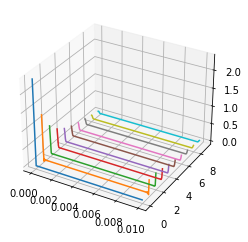

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
plt.set_cmap("jet_r")
u_plot = u[0::100,:]
for i in range(u_plot.shape[0]):
    ys = i*np.ones(u_plot.shape[1])
    ax.plot(x, ys, u_plot[i,:])

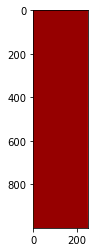

In [15]:
fig, axe = plt.subplots()
_ = axe.imshow(np.flipud(u))

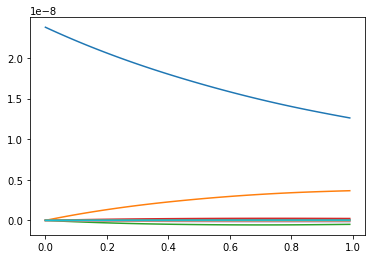

In [16]:
fig, axe = plt.subplots()
_ = axe.plot(t[:100], (u[:100,:10]))
#axe.set_ylim([0, 0.1])

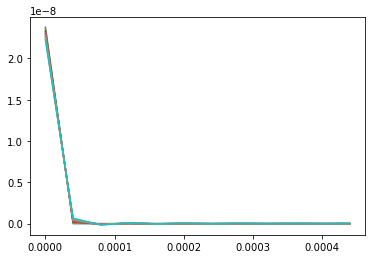

In [18]:
fig, axe = plt.subplots()
_ = axe.plot(x[:N//20], u[:10,:N//20].T)